# A. From Untidy to Tidy Data

## Example 1: Using `pd.melt()` – Converting Wide to Long Format
### Scenario:
- A DataFrame contains students' test scores in two subjects.
- Each row represents a student and each subject's score is in its own column.
- To analyze scores by subject, we want to convert it to long format.

### Tidy Data Principle Violated:
- Each variable should form a column.
- Here, the subject (Math/Science) is embedded in the column names rather than in a separate "Subject" column.

### Key Parameters:
- `id_vars`
    - **Description**: Columns to keep fixed (i.e., identifiers).
    - **Example**: In a dataset of student scores, you might use ['Student'] as the id_vars.

- `value_vars`
    - **Description**: Columns to unpivot (i.e., convert into row values).
    - **Example**: In the student scores example, this could be ['Math', 'Science'].

- `var_name`
    - **Description**: Name for the new column that will hold the former column names (the variable name).

- `value_name`
    - **Description**: Name for the new column that will hold the values from the melted columns.

### When to Use:
- Use `pd.melt()` when you have data in a wide format (with multiple columns representing the same kind of information) and you need to convert it into a long, tidy format where each row represents a single observation.


### Tidy Outcome:
- Each observation forms a row.
- Each variable (Student, Subject, Score) is in its own column.

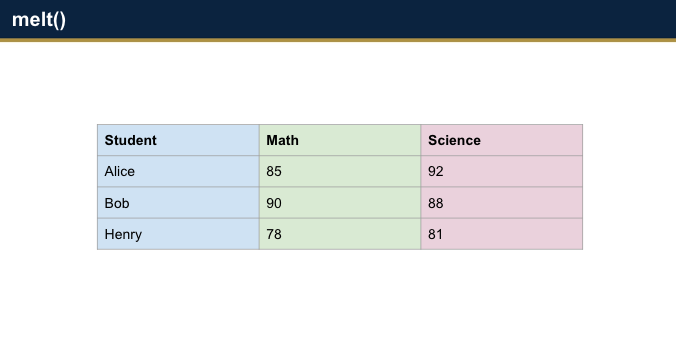

In [1]:
import pandas as pd

# Create a wide-format DataFrame (untidy form)
df_students = pd.DataFrame({
    'Student': ['Alice', 'Bob', 'Henry'],
    'Math': [85, 90, 78],
    'Science': [92, 88, 81]
})

print("Original (Untidy) Student Scores DataFrame:")
print(df_students)

# Melt the DataFrame: convert subject columns ('Math', 'Science') into a single 'Subject' column,
# with their corresponding scores in a new 'Score' column.
df_students_melted = pd.melt(df_students, id_vars=['Student'],
                             value_vars=['Math', 'Science'],
                             var_name='Subject', value_name='Score')

print("\nMelted (Tidy) Student Scores DataFrame:")
print(df_students_melted)

Original (Untidy) Student Scores DataFrame:
  Student  Math  Science
0   Alice    85       92
1     Bob    90       88
2   Henry    78       81

Melted (Tidy) Student Scores DataFrame:
  Student  Subject  Score
0   Alice     Math     85
1     Bob     Math     90
2   Henry     Math     78
3   Alice  Science     92
4     Bob  Science     88
5   Henry  Science     81


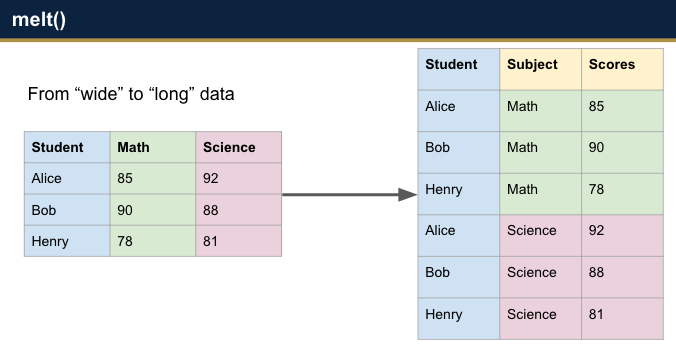

## Example 2: Converting Patient Blood Pressure Data from Wide to Tidy Format

### Scenario:
Imagine you have a dataset where each patient's blood pressure measurements are recorded over several visits in separate columns. This wide format is not ideal for analysis, because you may want to analyze trends over visits or compare readings between patients.

### Task:
- Transform this wide format into a tidy (long) format where:
- Each row represents one measurement.
- The columns include "Patient", "Visit" (extracted from the column name), and "Blood_Pressure".

### Outcome:
- The resulting tidy DataFrame has one row per patient per visit.
- The variable "Visit" is now in its own column, and the blood pressure reading is in a separate "Blood_Pressure" column.
- This structure makes it easier to analyze trends, perform statistical tests, or create visualizations (e.g., line plots of blood pressure over visits).

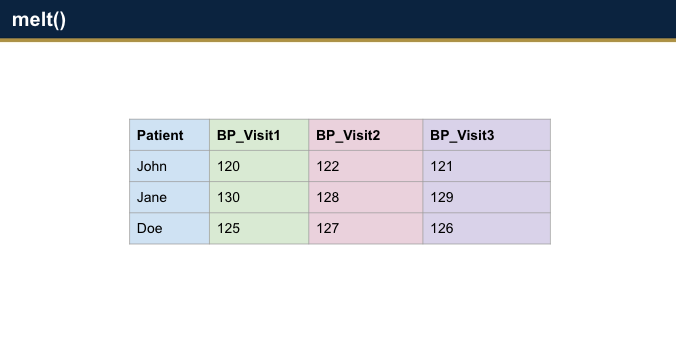

In [2]:
import pandas as pd

# Create the untidy (wide) DataFrame for blood pressure measurements
df_bp = pd.DataFrame({
    'Patient': ['John', 'Jane', 'Doe'],
    'BP_Visit1': [120, 130, 125],
    'BP_Visit2': [122, 128, 127],
    'BP_Visit3': [121, 129, 126]
})

print("Original (Untidy) Blood Pressure DataFrame:")
print(df_bp)

# Melt the DataFrame: Convert columns 'BP_Visit1', 'BP_Visit2', and 'BP_Visit3'
# into two columns: 'Visit' and 'Blood_Pressure'
df_bp_melted = pd.melt(df_bp, id_vars=['Patient'],
                       value_vars=['BP_Visit1', 'BP_Visit2', 'BP_Visit3'],
                       var_name='Visit', value_name='Blood_Pressure')

# Clean the 'Visit' column to make it more readable (e.g., remove "BP_" prefix)
df_bp_melted['Visit'] = df_bp_melted['Visit'].str.replace('BP_Visit', '')

print("\nMelted (Tidy) Blood Pressure DataFrame:")
print(df_bp_melted)

Original (Untidy) Blood Pressure DataFrame:
  Patient  BP_Visit1  BP_Visit2  BP_Visit3
0    John        120        122        121
1    Jane        130        128        129
2     Doe        125        127        126

Melted (Tidy) Blood Pressure DataFrame:
  Patient Visit  Blood_Pressure
0    John     1             120
1    Jane     1             130
2     Doe     1             125
3    John     2             122
4    Jane     2             128
5     Doe     2             127
6    John     3             121
7    Jane     3             129
8     Doe     3             126


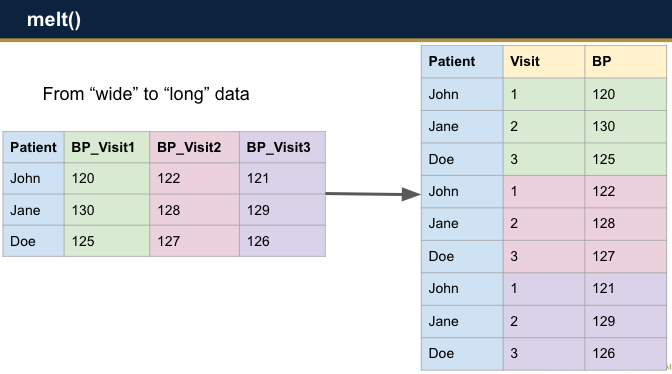

# B. Useful Cases for Untidy Data

## Example 3: Using `pivot()` – Converting Long to Wide Format
### Scenario:
- A tidy DataFrame contains daily temperature readings in different cities.
- For a report, you might want to pivot the data so that each city becomes its own column.

### Tidy Data Principle Consideration:
- Converting tidy to wide moves a variable (here, "City") into column headers.
- This can aid visual comparison even though it diverges from the strict tidy form.

### Key Parameters:

- `index`
    - **Description**: Column(s) to use as the new row labels (the unique identifier for rows).
    - **Example**: In a temperature dataset, index='date'.

- `columns`
    - **Description**: Column whose unique values will become the new column headers.
    - **Example**: In a weather dataset, `columns='City'` to pivot city temperatures.

- `values`
    - **Description**: Column to populate the new DataFrame’s values.

### Important Consideration:
- `pivot()` requires that the combination of index and columns is unique. If duplicates exist, it will raise an error. For aggregation in such cases, use `pivot_table()`.

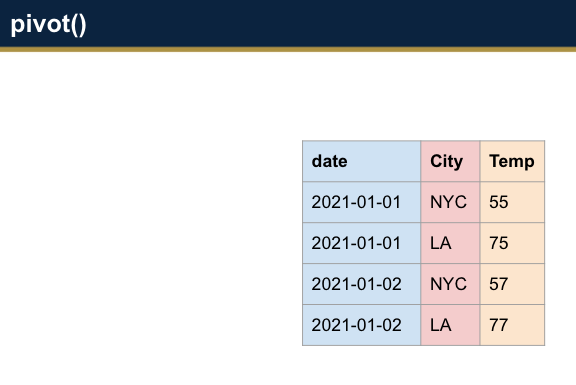

In [3]:
# Create a long-format DataFrame (tidy form)
data_weather = {
    'date': ['2021-01-01', '2021-01-01', '2021-01-02', '2021-01-02'],
    'City': ['New York', 'Los Angeles', 'New York', 'Los Angeles'],
    'Temperature': [55, 75, 57, 77]
}
df_weather_long = pd.DataFrame(data_weather)

print("\nOriginal (Tidy) Weather DataFrame:")
print(df_weather_long)

# Pivot the DataFrame: use 'date' as the index and make each city a separate column.
df_weather_pivot = df_weather_long.pivot(index='date', columns='City', values='Temperature')

print("\nPivoted (Wide/Untidy) Weather DataFrame:")
print(df_weather_pivot)


Original (Tidy) Weather DataFrame:
         date         City  Temperature
0  2021-01-01     New York           55
1  2021-01-01  Los Angeles           75
2  2021-01-02     New York           57
3  2021-01-02  Los Angeles           77

Pivoted (Wide/Untidy) Weather DataFrame:
City        Los Angeles  New York
date                             
2021-01-01           75        55
2021-01-02           77        57


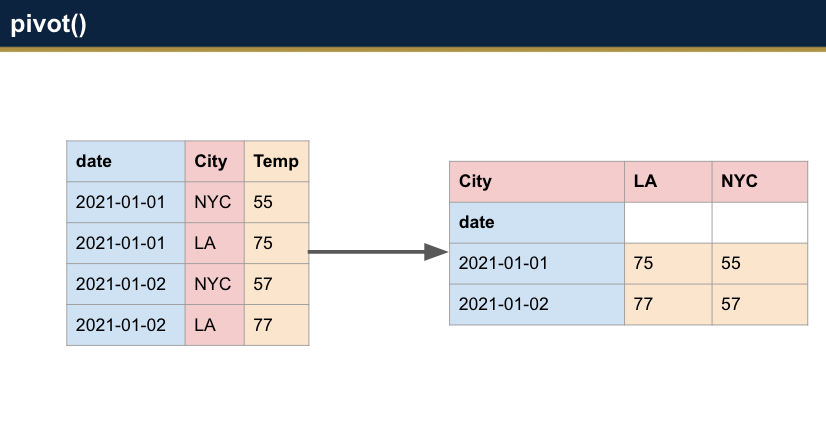

## Example 4: Creating a Pivot Table with `pivot_table()` – Summarizing Tidy Data

### Scenario:
- You have employee salary data by department and gender.
- You want to summarize average salaries by department and gender.

### Tidy Data Consideration:
- The pivot table aggregates data (here, computing the mean salary) and may combine identifiers with summaries.
- While the result is not strictly "raw" tidy data, it’s extremely useful for analysis.
- Different than `pivot()` which does not aggregate data.

### Key Parameters:
- `index`
    - **Description**: Column(s) to use as row labels.

- `columns`
    - **Description**: Column whose unique values will become new column headers.

- `values`
    - **Description**: Column whose values fill the new DataFrame.

- `aggfunc`
    - **Description**: Aggregation function to apply when multiple values exist for a given index/column combination.
    - Common Examples: `"mean"`, `"sum"`, `"median"`, or a custom function.

### When to Use:
- Use `pivot_table()` when your data might contain duplicates and you need to aggregate them (e.g., computing the average salary by department when multiple employees belong to the same department).

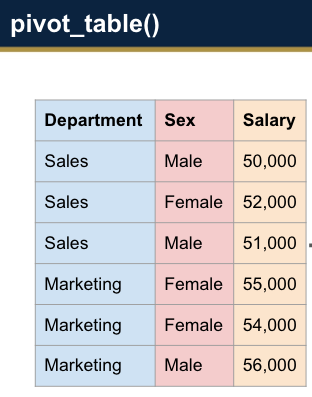

In [4]:
# Create a sample tidy DataFrame for employee salaries
df_salaries = pd.DataFrame({
    'Department': ['Sales', 'Sales', 'Sales', 'Marketing', 'Marketing', 'Marketing'],
    'Sex': ['Male', 'Female', 'Male', 'Female', 'Female', 'Male'],
    'Salary': [50000, 52000, 51000, 55000, 54000, 56000]
})

print("\nOriginal Employee Salary DataFrame:")
print(df_salaries)

# Create a pivot table: aggregate 'Salary' using the mean,
# with 'Department' as the index and 'Gender' as the columns.
pivot_table_salary = pd.pivot_table(df_salaries, values='Salary',
                                    index='Department', columns='Sex', aggfunc='mean')

print("\nPivot Table (Average Salary by Department and Gender):")
print(pivot_table_salary)


Original Employee Salary DataFrame:
  Department     Sex  Salary
0      Sales    Male   50000
1      Sales  Female   52000
2      Sales    Male   51000
3  Marketing  Female   55000
4  Marketing  Female   54000
5  Marketing    Male   56000

Pivot Table (Average Salary by Department and Gender):
Sex          Female     Male
Department                  
Marketing   54500.0  56000.0
Sales       52000.0  50500.0


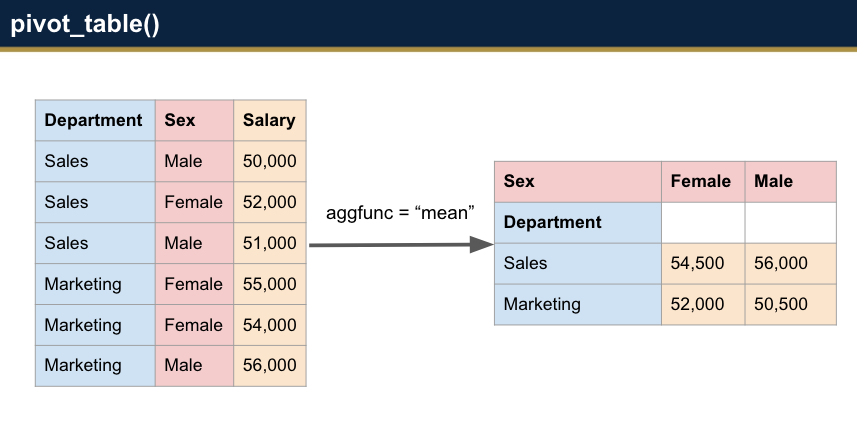

# C. Multi-Index Data Reshaping

## Example 5: Using `stack()` and `unstack()` – Switching Between Tidy and Untidy Representations

### Scenario:
- A DataFrame contains quarterly sales data for three cities.
- Initially, the data is in wide format, with separate columns for Q1 and Q2 sales.
- You want to convert it to a long format for analysis and then revert it back.

### Tidy Data Perspective:
- Stacking transforms the wide data into a long, tidy format where each row represents a single observation.
- Unstacking reverts the long format back into wide format for reporting or visualization.

### Transformation with `stack()` (Untidy to Tidy):
- Converts columns of a DataFrame into a lower level of the row index (i.e., “stacks” the columns).

### When to Use:
- Use `stack()` when you want to convert a wide DataFrame (especially one with hierarchical column indexing) into a long format where the former columns become part of the row index.

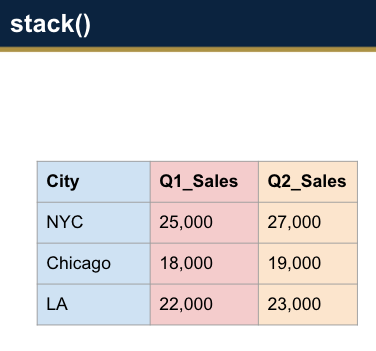

In [5]:
# Create a DataFrame with quarterly sales data for cities (wide format)
df_sales = pd.DataFrame({
    'City': ['New York', 'Chicago', 'Los Angeles'],
    'Q1_Sales': [25000, 18000, 22000],
    'Q2_Sales': [27000, 19000, 23000]
}).set_index('City')

print("\nOriginal Sales DataFrame (Wide Format):")
print(df_sales)

# Stack the DataFrame: convert the quarterly sales columns into a new level of the index,
# resulting in a long, tidy format.
df_sales_stacked = df_sales.stack()
print("\nStacked Sales DataFrame (Tidy/Long Format):")
print(df_sales_stacked)


Original Sales DataFrame (Wide Format):
             Q1_Sales  Q2_Sales
City                           
New York        25000     27000
Chicago         18000     19000
Los Angeles     22000     23000

Stacked Sales DataFrame (Tidy/Long Format):
City                 
New York     Q1_Sales    25000
             Q2_Sales    27000
Chicago      Q1_Sales    18000
             Q2_Sales    19000
Los Angeles  Q1_Sales    22000
             Q2_Sales    23000
dtype: int64


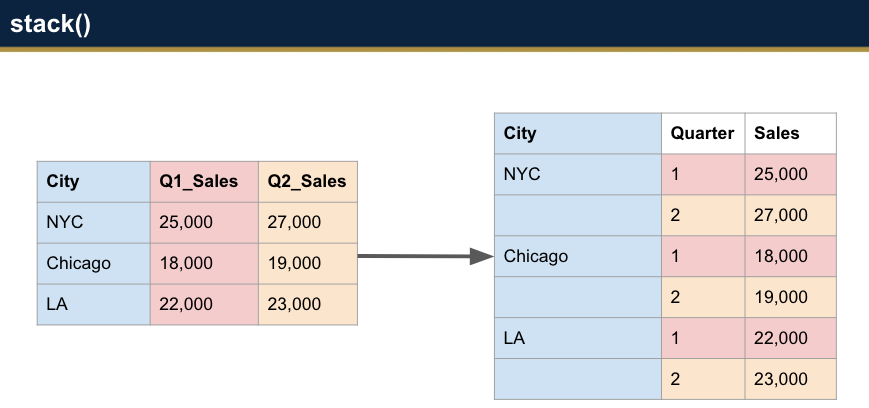

### And Reversing with unstack() (Tidy to Untidy):
- Performs the inverse operation of stack() by pivoting a level of the row index into the columns.

### When to Use:
- Use `unstack()` when you want to transform a long DataFrame (with a hierarchical index) back into a wide format by moving one of the index levels into the column axis.

In [6]:
# Unstack the DataFrame: convert it back to its original wide format.
df_sales_unstacked = df_sales_stacked.unstack()
print("\nUnstacked Sales DataFrame (Back to Wide Format):")
print(df_sales_unstacked)


Unstacked Sales DataFrame (Back to Wide Format):
             Q1_Sales  Q2_Sales
City                           
New York        25000     27000
Chicago         18000     19000
Los Angeles     22000     23000


## Summary
- `melt()`/`pivot()`:
    - Best for simple reshaping of flat DataFrames when you know exactly which columns are identifiers and which are variables.

- `pivot_table()`:
    - Ideal when you need to reshape and aggregate data, especially when duplicate index/column combinations exist.

- `stack()`/`unstack()`:
    - Provide more granular control for reshaping MultiIndex DataFrames, moving levels between the row index and columns.